# ACE_krill dataset computing the depth

## Data description

Data collected during the Antarctic Circumnavigation Expedition (ACE) in 2017 using an EK80 echosounder running at a frequency of 200 kHz.

## Objective

Extracting the krill parameters: the depth and height of the krill swarm

## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
#import scipy.signal
#import skimage

## Import data



We import the csv file.

In [2]:
import ACE_box
import importlib
importlib.reload(ACE_box)

<module 'ACE_box' from '/home/benjamin/Documents/datascience/data jam days/scripts/ACE_box.py'>

In [3]:
data_path = '/home/benjamin/Documents/datascience/ACE/'
filename = data_path + 'ACE_-D20170207-T104031.sv.csv'
info_df,data_trunc,depth_data = ACE_box.extract_data(filename)

Data matrix size: (2693, 9163)
Start depth (in meters): 0.09278976
Stop depth (in meters): 499.8584359
Nb of pixels along depth axis: 2693
Depth per pixel (in meters): 0.185579519547


## Filtering processes

In [4]:
data_rescale = ACE_box.fix_contrast(data_trunc)

In [5]:
data2 =data_rescale.copy()
#data2[data<-70] = -70
#data2[data>-65] = -65
#data2 = data2 + 70

In [30]:
np.min(data3)

-1.7649695888623489

In [6]:
data3 = ACE_box.remove_vertical_lines(data2)
data3 = ACE_box.substract_meanovertime(data3)

Number of noisy pixels:  5333


In [7]:
import ACE_box
import importlib
importlib.reload(ACE_box)

<module 'ACE_box' from '/home/benjamin/Documents/datascience/data jam days/scripts/ACE_box.py'>

In [8]:
gauss_denoised = ACE_box.gaussian_filter(data3)

In [9]:
krillsignal,energy_fluctuation = ACE_box.krill_function(gauss_denoised,1)

In [10]:
energy_fluctuation

0.71601638948556867

In [64]:
import ACE_box
import importlib
importlib.reload(ACE_box)

<module 'ACE_box' from '/home/benjamin/Documents/datascience/data jam days/scripts/ACE_box.py'>

In [12]:
kchunks = ACE_box.extract_krillchunks(krillsignal,data3)
kchunks_gauss = ACE_box.extract_krillchunks(krillsignal,gauss_denoised)

In [13]:
print("Nb of chunks: ",len(kchunks))

Nb of chunks:  54


In [14]:
idx = 1
print(kchunks[idx]['Ping_start_index'],kchunks[idx]['Ping_end_index'])
print(kchunks[idx]['data'].shape)

43 47
(492, 5)


<IPython.core.display.Javascript object>


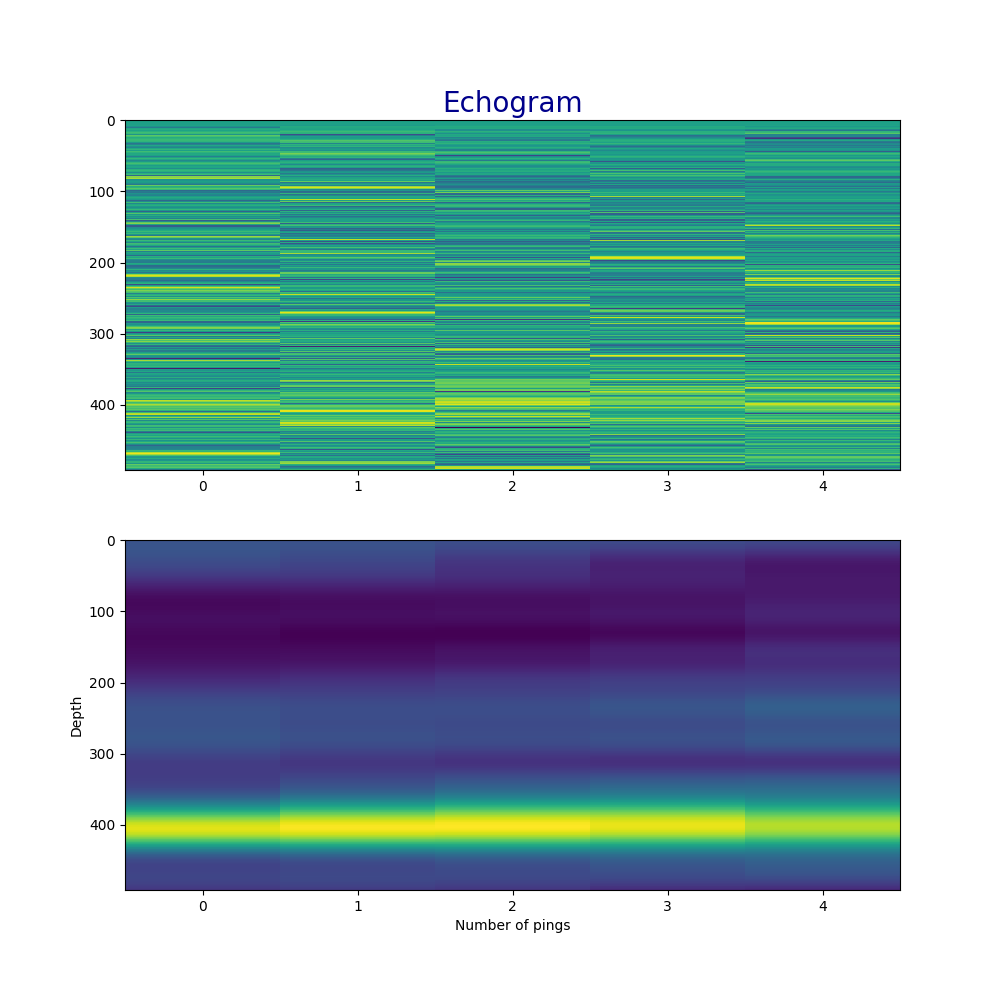

In [53]:
%matplotlib notebook
from matplotlib import pyplot as plt
idx=19
plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,1,1)
ax1.imshow(kchunks[idx]['data'],aspect='auto')
plt.title('Echogram',fontsize=20, color="darkblue")
ax2 = plt.subplot(2,1,2)
ax2.imshow(kchunks_gauss[idx]['data'],aspect='auto')
plt.ylabel('Depth')
plt.xlabel('Number of pings')
plt.show()

In [54]:
idx = 19
test_chunk = kchunks_gauss[idx]['data']
distribution = np.sum(test_chunk,axis=1)

<IPython.core.display.Javascript object>


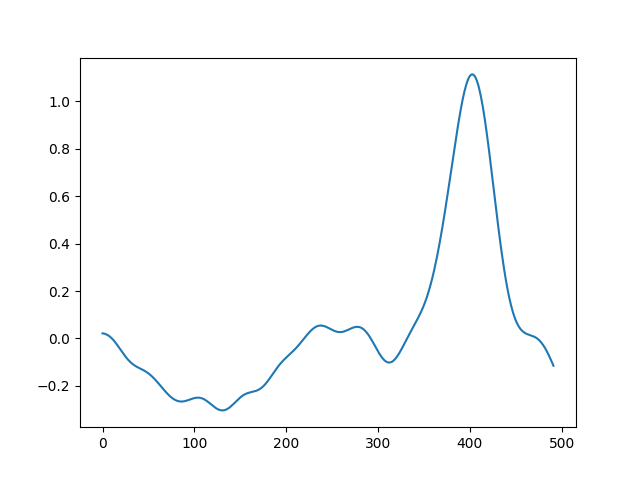

In [55]:
plt.plot(distribution)

In [63]:
distribution_large = distribution.copy()
distribution_large[distribution_large<0.5*np.max(distribution_large)] =0
#density = distribution**2/np.sum(distribution**2)
#density = (distribution-np.min(distribution))**2/np.sum((distribution-np.min(distribution))**2)
#density = distribution
#density[density<0] = 0
density = distribution_large/np.sum(distribution_large)
depth_coord = np.arange(0,len(density))
mean_point = np.sum(density*depth_coord)
sigma = np.sqrt((np.sum(density*(depth_coord-mean_point)**2)))
print(mean_point-2*sigma,'Mean:',mean_point,mean_point+2*sigma,'Height:',4*sigma)

372.423803006 Mean: 401.275171564 430.126540123 Height: 57.702737117


<IPython.core.display.Javascript object>


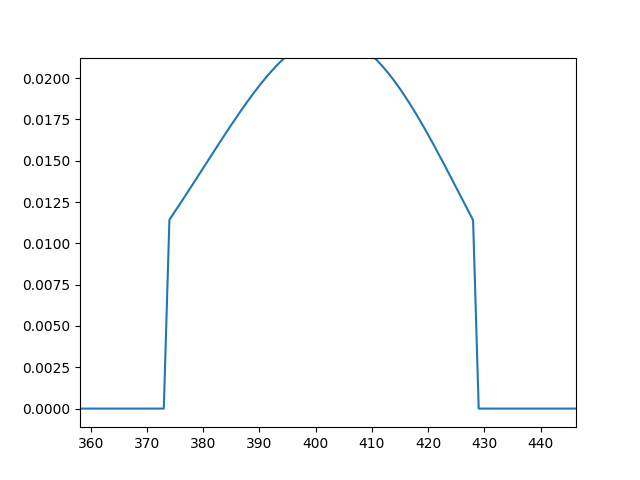

In [59]:
plt.plot(density)

In [65]:
print(ACE_box.swarm_depth(test_chunk))

(401.27517156423204, 57.702737117007914)


<IPython.core.display.Javascript object>


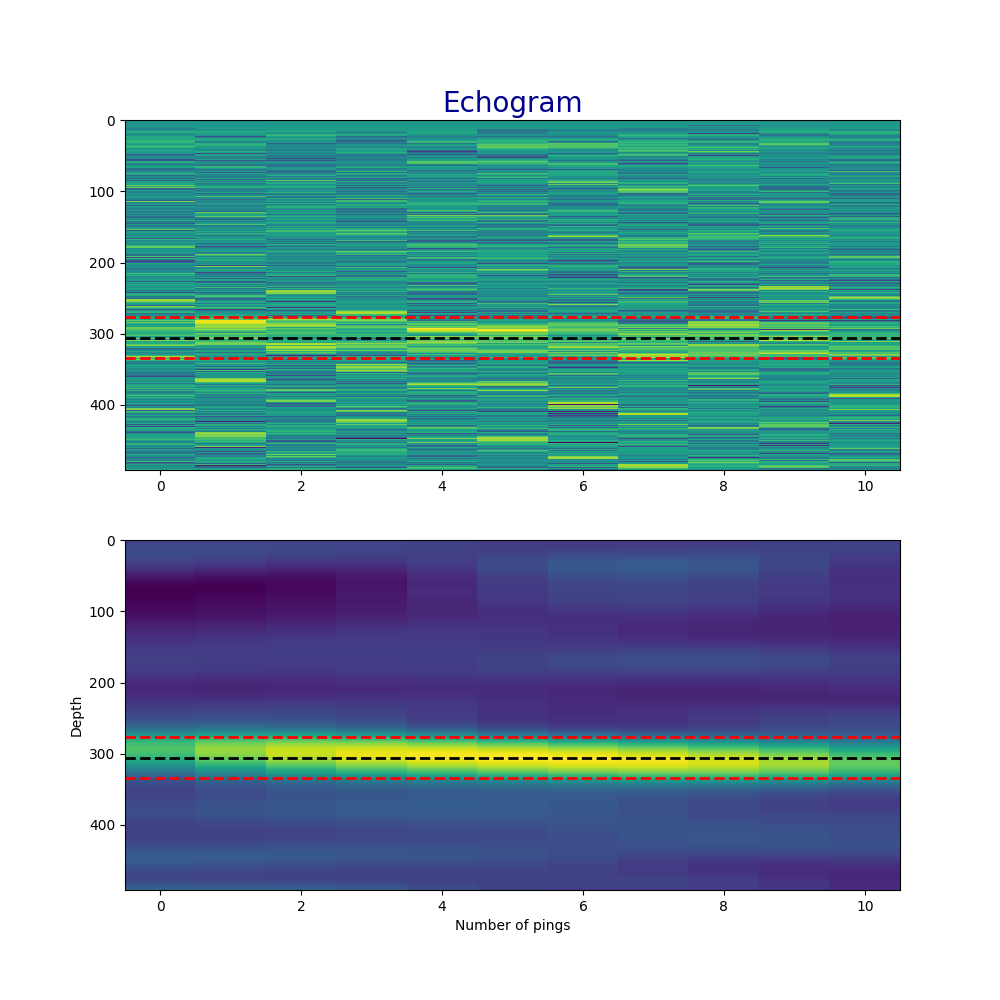

In [79]:
%matplotlib notebook
from matplotlib import pyplot as plt
idx=13
plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,1,1)
ax1.imshow(kchunks[idx]['data'],aspect='auto')
plt.title('Echogram',fontsize=20, color="darkblue")
ax2 = plt.subplot(2,1,2, sharex=ax1, sharey=ax1)
ax2.imshow(kchunks_gauss[idx]['data'],aspect='auto')
plt.ylabel('Depth')
plt.xlabel('Number of pings')

test_chunk = kchunks_gauss[idx]['data']
depth_point ,height = ACE_box.swarm_depth(test_chunk)

ax1.plot([0-1/2, test_chunk.shape[1]-1/2], [depth_point,depth_point], 'k--',linewidth=2)
ax1.plot([0-1/2, test_chunk.shape[1]-1/2], [depth_point-height/2,depth_point-height/2], 'r--',linewidth=2)
ax1.plot([0-1/2, test_chunk.shape[1]-1/2], [depth_point+height/2,depth_point+height/2], 'r--',linewidth=2)

ax2.plot([0-1/2, test_chunk.shape[1]-1/2], [depth_point,depth_point], 'k--',linewidth=2)
ax2.plot([0-1/2, test_chunk.shape[1]-1/2], [depth_point-height/2,depth_point-height/2], 'r--',linewidth=2)
ax2.plot([0-1/2, test_chunk.shape[1]-1/2], [depth_point+height/2,depth_point+height/2], 'r--',linewidth=2)

